# Module Six Problem Set: Decision Trees

In this notebook, you have been given a set of steps that will show you how to create and train a decision tree. It is very important to run the steps in order. Some steps depend on the outputs of earlier steps. Once you have run all the steps, you will be asked to create your own decision tree models to help you answer the questions in the Module Six Problem Set. You are expected to write the R script yourself to answer these questions.

Reminder: If you have not already reviewed the Problem Set Report template for your Module Six Problem Set, be sure to do so now. That will give you an idea of the questions you will need to answer with the outputs of this script. You should use the code you are given as reference when writing your own scripts.

## Step 1: Loading the Data Set (for the Classification Decision Tree)
You are a risk analyst working for a credit card company. You have access to a set of historical data that can be used to study the relationships between customer characteristics and whether or not they are likely to default on their credit. It is important for the company to calculate the risk that their customers will default on their credit. The table below shows some of the characteristics that will be used in the analysis below. 

This block of R code will load the **credit_card_default.csv** data set. Here are the variables that will be retained.

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> Age of the individual </div> |
| <div style="text-align: left"> sex </div> | <div style="text-align: left"> Sex of individual (male or female) </div> |
| <div style="text-align: left"> education </div> | <div style="text-align: left"> Highest education level attained (high school, college, or post graduate)</div> |
| <div style="text-align: left"> marriage </div> | <div style="text-align: left"> Is the individual married or unmarried?</div> |
| <div style="text-align: left"> assets </div> | <div style="text-align: left"> Assets owned by the individual (none, car only, house only, car and house) </div> |
| <div style="text-align: left"> missed_payment </div> | <div style="text-align: left"> Did the individual miss payments in the last 3 months? (missed or none) </div> |
| <div style="text-align: left"> credit_utilize </div> | <div style="text-align: left"> Credit utilization by the individual, meaning how much of the credit allowed is being used </div> |
| <div style="text-align: left"> default </div> | <div style="text-align: left"> Did the individual default on their credit? (default, no default) </div> |
Note: Credit utilization is expressed as a decimal representing the percentage of your total credit limit you have utilized. For example, if you have used 50% of your credit limit, the value of credit_utilize would be 0.50.

Reference: 
Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480. Retrieved from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients 


Click the code section below and hit the **Run** button above.
<br><br>
<font color='red'>**Note:** The code section below will first install one R package: "rpart.plot". Please do not move to the next step until the package is fully installed. This will take some time. Once the installation is complete, this step will print first 6 rows of the data set.</font>

In [12]:
print("The code section below will first install one R package: rpart.plot.")
print("Please do not move to the next step until the package is fully installed.")
print("This will take some time. Once the installation is complete, this step will print first 6 rows of the data set.")


# Loading package to show the decision tree
install.packages("rpart.plot")

# Loading credit card default data set
credit_default <- read.csv(file='credit_card_default.csv', header=TRUE, sep=",")

print("installation completed!")
print("data set (first 6 rows)")
head(credit_default, 6)

[1] "The code section below will first install one R package: rpart.plot."
[1] "Please do not move to the next step until the package is fully installed."
[1] "This will take some time. Once the installation is complete, this step will print first 6 rows of the data set."


Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)


[1] "installation completed!"
[1] "data set (first 6 rows)"


age,sex,education,marriage,assets,missed_payment,credit_utilize,default
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
28,male,college,married,house,no,0.191,no
31,female,postgraduate,married,car_house,no,0.196,no
48,female,college,married,house,yes,1.000,yes
35,male,high_school,married,car,yes,1.000,yes
30,female,high_school,unmarried,car,no,0.374,yes
23,female,high_school,unmarried,house,yes,0.970,yes


## Step 2: Splitting Data into Training and Testing Sets
In this step, you will split the data set into training and testing sets. The training set will be used to create the decision tree model and the testing set will be used to validate the model that is created. The training set and testing set split will be 60% and 40%, respectively. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the block of code below and hit the **Run** button above.  

In [12]:
set.seed(507690)

# Partition the data set into training and testing data
samp.size = floor(0.60*nrow(credit_default))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(credit_default)), size = samp.size)
train.data1 = credit_default[train_ind,]
nrow(train.data1)

# Testing set 
print("Number of rows for the validation set")
test.data1 = credit_default[-train_ind,]
nrow(test.data1)

[1] "Number of rows for the training set"


[1] 360

[1] "Number of rows for the validation set"


[1] 240

## Step 3: Constructing the Classification Decision Tree
This step will create the decision tree classification model to predict an individual defaulting on their credit using missed payments, education, and age. The R **rpart** library includes a method *rpart* that can create a decision tree classifier. This method can take several arguments to optimize the tree, but we will start with only assigning minimum split to 15. The minimum split is the minimum number of observations that must exist in a node in order for a split to be attempted. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the block of code below and hit the **Run** button above.  

In [3]:
set.seed(507690)

library(rpart)
model1 <- rpart(default ~ missed_payment + education + age, method="class", data=train.data1, control = rpart.control(minsplit=10))
printcp(model1)


Classification tree:
rpart(formula = default ~ missed_payment + education + age, data = train.data1, 
    method = "class", control = rpart.control(minsplit = 10))

Variables actually used in tree construction:
[1] age            education      missed_payment

Root node error: 159/360 = 0.44167

n= 360 

        CP nsplit rel error  xerror     xstd
1 0.496855      0   1.00000 1.00000 0.059258
2 0.081761      1   0.50314 0.50314 0.049611
3 0.018868      3   0.33962 0.35849 0.043562
4 0.015723      4   0.32075 0.38994 0.045056
5 0.010000      6   0.28931 0.35849 0.043562


## Step 4: Cross Validation Error and Cost-Complexity
This block of R code will plot cross validation errors against cost-complexity parameter **cp**. This will assist you in selecting an appropriate model by pruning the tree. A horizontal red line will be drawn one standard error above the minimum error. In general, the largest **cp** value that achieves a cross validation error below the red line is chosen to prune the tree.

Click the code section below and hit the **Run** button above.

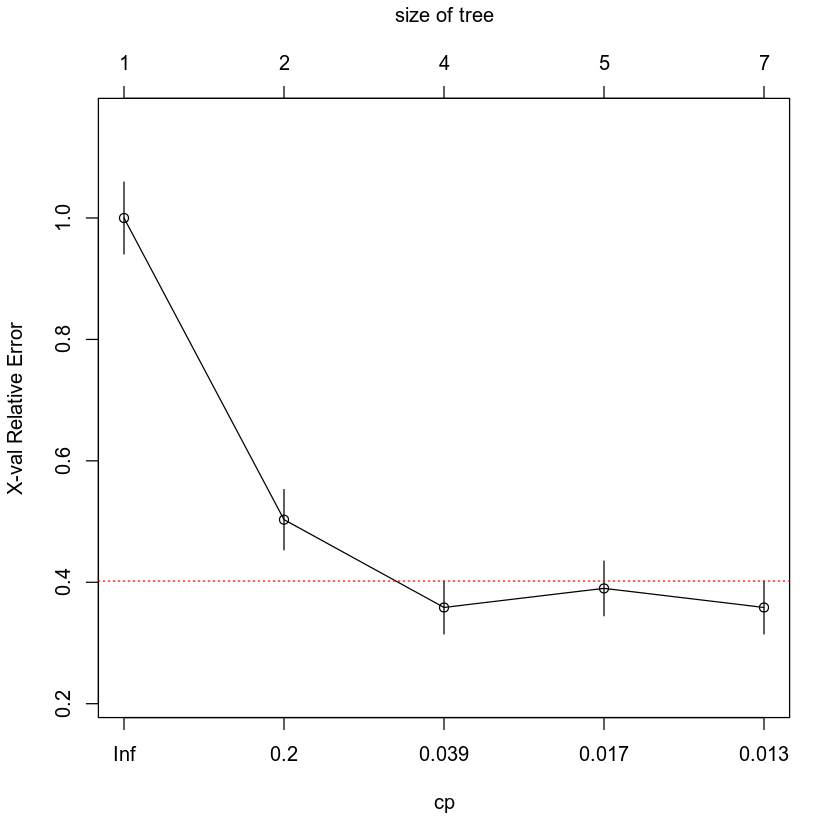

In [4]:
#plotcp(model) # Visualize cross validation results
plotcp(model1, minline = TRUE, lty = 3, col = 2, upper = c("size", "splits", "none"))

## Step 5: Pruning the Tree
Using the plot in step 4, a good choice of cp for pruning is often the leftmost value for which the error lies below the horizontal red line. We will pick cp=0.039 and rerun the model, setting the cp parameter to this value. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the code section below and hit the **Run** button above.

In [5]:
set.seed(507690)
pruned_model1 <- rpart(default ~ missed_payment + education + age, method="class",  data=train.data1, control = rpart.control(cp = 0.039))
printcp(pruned_model1)


Classification tree:
rpart(formula = default ~ missed_payment + education + age, data = train.data1, 
    method = "class", control = rpart.control(cp = 0.039))

Variables actually used in tree construction:
[1] education      missed_payment

Root node error: 159/360 = 0.44167

n= 360 

        CP nsplit rel error  xerror     xstd
1 0.496855      0   1.00000 1.00000 0.059258
2 0.081761      1   0.50314 0.50314 0.049611
3 0.039000      3   0.33962 0.33962 0.042610


## Step 6: Plotting the Classification Decision Tree
This block of R code will provide a visual of the pruned decision tree model.
<br><br>
Each node shows:
- The predicted class (default or no default)
- The predicted probability of the event (defaulting)
- The percentage of observations in the node


Click the code section below and hit the **Run** button above.

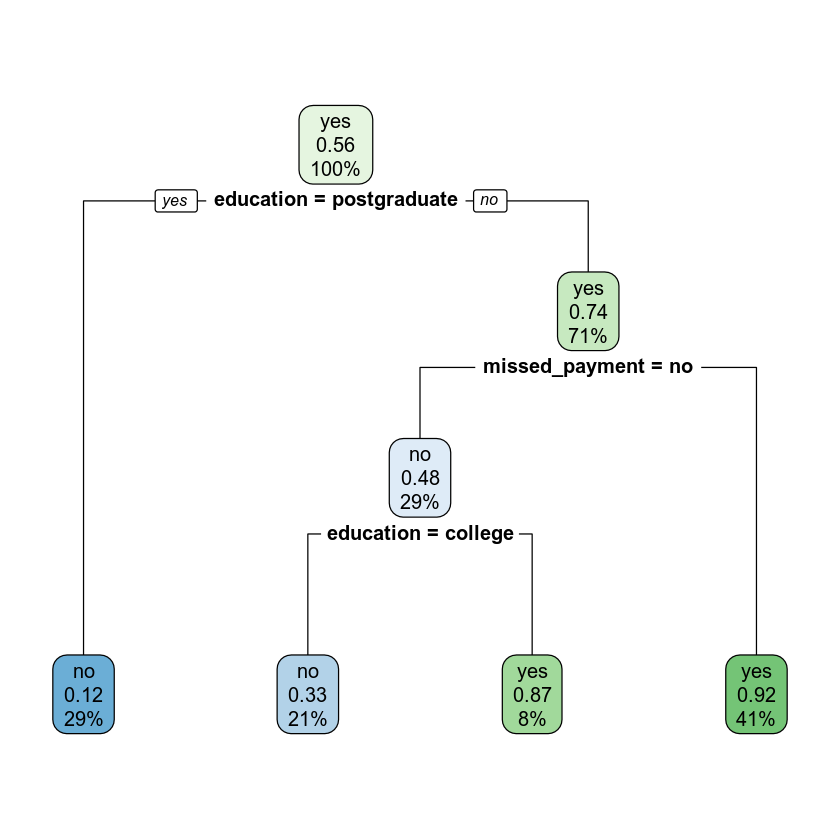

In [6]:
library(rpart.plot)
rpart.plot(pruned_model1)

### Interpreting the tree
As an example, the lower-right box can be interpreted as:
- education="postgraduate" is no (meaning that the individual is not a postgraduate).
- missed_payment="no" is no (meaning that the individual has missed payments). 
<br><br>

This box should say "Yes, 0.92, 41%".
- "Yes" means that majority of the observations are default=Yes (meaning that the individual defaulted).
- 0.92 means that the probability of defaulting in that box is 0.92.
- 41% means that 41% of the total observations in the training set fall in that node.

## Step 7: Confusion Matrix
This block of R code will obtain the confusion matrix using the model on the testing set. It will calculate the accuracy, precision, and recall. The confusion matrix, also known as an error matrix, allows us to evaluate the performance of the model. The rows of the table represent the predicted outcomes while the columns represent the actual outcomes. The table output is of the form:


|              | **Prediction = 0**        | **Prediction = 1**        |
|--------------|-----------------|-----------------|
| **Actual = 0** | True Negatives  | False Positives |
| **Actual = 1** | False Negatives | True Positives  |

- True Positive (TP): The actual value is 1 (default=1) and the predicted value is 1 (default=1), hence a true positive. 
- True Negative (TN): The actual value is 0 (default=0) and the predicted value is 0 (default=0), hence a true negative. 
- False Positive (FP): The actual value is 0 (default=0) and the predicted value is 1 (default=1), hence a false positive. This is also the Type 1 Error.
- False Negative (FN): The actual value is 1 (default=1) and the predicted value is 0 (default=0), hence a false negative. This is also the Type 2 Error.

<br><br>

**Accuracy** is the ratio of the number of correct predictions to the total number of observations.
<br><br>
\begin{equation*}
Accuracy = \frac{TP\ +\ TN}{TP\ +\ TN\ +\ FP\ + FN} 
\end{equation*}

<br><br>

**Precision** is the ratio of correct positive predictions to the total predicted positives.
<br><br>
\begin{equation*}
Precision = \frac{TP}{TP\ +\ FP} 
\end{equation*}

<br><br>

**Recall** is the ratio of correct positive predictions to the total positives examples.

\begin{equation*}
Recall = \frac{TP}{TP\ +\ FN} 
\end{equation*}

<br><br>

Click the code section below and hit the **Run** button above.

In [7]:
# Make predictions on the test data
pred <- predict(pruned_model1, newdata=test.data1, type='class')

# Construct the confusion matrix
conf.matrix <- table(test.data1$default, pred)[,c('no','yes')]
rownames(conf.matrix) <- paste("Actual default ", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction default ", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction default : no,Prediction default : yes
Actual default : no,93,24
Actual default : yes,27,96


## Step 7: Prediction
The classification decision tree model can now be used to make predictions.   

Click the block of code below and hit the **Run** button above.  

In [8]:
print("Prediction for defaulting (yes or no): missed_payment='none', education='postgraduate', age=42")
newdata1 <- data.frame(missed_payment='no', education='postgraduate', age=42)
predict(pruned_model1, newdata1, type='class')

print("Prediction for defaulting (yes or no): missed_payment='missed', education='high_school', age=42")
newdata2 <- data.frame(missed_payment='yes', education='high_school', age=42)
predict(pruned_model1, newdata2, type='class')

[1] "Prediction for defaulting (yes or no): missed_payment='none', education='postgraduate', age=42"


1 
no 
Levels: no yes

[1] "Prediction for defaulting (yes or no): missed_payment='missed', education='high_school', age=42"


1 
yes 
Levels: no yes

## Step 8: Loading the Data Set (for the Regression Decision Tree)
You are an analyst working for the government and you have access to a set of historical data that can be used to study wage growth of the labor force. Governments are interested in studying wage growth patterns based on their economic agenda. This data set has other economic factors that are related to wage growth. You will use this data set to create models for wage growth.

This block of R code will load the **economic** data set from a CSV file. It will then display the first six rows of the data. Here are the variables contained in the data set: 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> wage_growth </div> | <div style="text-align: left"> Wage growth rate </div> |
| <div style="text-align: left"> inflation </div> | <div style="text-align: left"> Rate of inflation </div> |
| <div style="text-align: left"> unemployment </div> | <div style="text-align: left"> Unemployment rate</div> |
| <div style="text-align: left"> economy </div> | <div style="text-align: left"> Economy in recession or not in recession </div> |
| <div style="text-align: left"> gdp </div> | <div style="text-align: left"> GDP growth rate </div> |

Note: This is a simulated data set based on a real-world problem.

Click the code section below and hit the **Run** button above.

In [2]:
# Load the data set
economic <- read.csv(file='economic.csv', header=TRUE, sep=",")

# Print the first six rows
print("head")
head(economic, 6)

[1] "head"


wage_growth,inflation,unemployment,economy,education,gdp
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
7.30,4.49,3.56,no_recession,college,6.27
9.05,9.59,2.42,no_recession,college,9.44
10.08,11.36,1.23,no_recession,post_graduate,18.29
10.98,9.55,1.18,no_recession,post_graduate,19.96
8.54,8.63,2.54,no_recession,high_school,8.43
9.75,8.26,2.22,no_recession,college,17.85


## Step 9: Splitting Data into Training and Testing Sets
In this step, you will split the data set into training and testing sets. The training set will be used to create the decision tree model and the testing set will be used to test the model that is created. The training set and testing set split will be 80% and 20%, respectively. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the block of code below and hit the **Run** button above.  

In [10]:
set.seed(507690)

# Partition the data set into training and testing data
samp.size = floor(0.80*nrow(economic))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(economic)), size = samp.size)
train.data2 = economic[train_ind,]
nrow(train.data2)

# Testing set 
print("Number of rows for the testing set")
test.data2 = economic[-train_ind,]
nrow(test.data2)

[1] "Number of rows for the training set"


[1] 79

[1] "Number of rows for the testing set"


[1] 20

## Step 10: Constructing the Regression Decision Tree
This step will create the decision tree regression model to predict wage growth using economy and inflation. Since we are now creating a regression tree, the method will be set to "anova". The minimum split will be set to 10. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the block of code below and hit the **Run** button above.  

In [11]:
set.seed(507690)

library(rpart)
model2 <- rpart(wage_growth ~ economy + inflation + gdp, method="anova", data=train.data2, control = rpart.control(minsplit=10))
printcp(model2)


Regression tree:
rpart(formula = wage_growth ~ economy + inflation + gdp, data = train.data2, 
    method = "anova", control = rpart.control(minsplit = 10))

Variables actually used in tree construction:
[1] gdp       inflation

Root node error: 614.68/79 = 7.7807

n= 79 

        CP nsplit rel error  xerror     xstd
1 0.700601      0   1.00000 1.02934 0.137290
2 0.109853      1   0.29940 0.34596 0.045181
3 0.059054      2   0.18955 0.30416 0.045567
4 0.020454      3   0.13049 0.22644 0.033865
5 0.018098      4   0.11004 0.20723 0.029033
6 0.011350      5   0.09194 0.21182 0.029647
7 0.010000      6   0.08059 0.18480 0.026645


## Step 11: Cross Validation Error and Cost-Complexity
This block of R code will plot cross validation errors against the cost-complexity parameter **cp**. This will assist you in selecting an appropriate model by pruning the tree. A horizontal red line will be drawn one standard error above the minimum error. In general, the largest **cp** value that achieves a cross validation error below the red line is chosen to prune the tree.

Click the code section below and hit the **Run** button above.

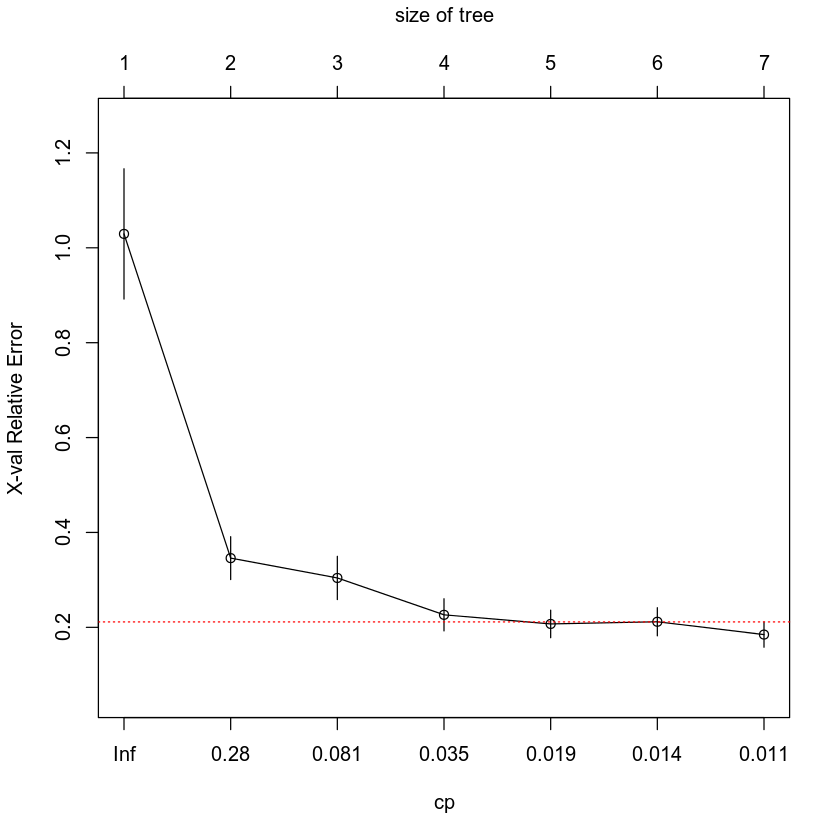

In [12]:
# Visualize cross validation results
plotcp(model2, minline = TRUE, lty = 3, col = 2, upper = c("size", "splits", "none"))

## Step 12: Pruning the Tree
A good choice of cp for pruning is often the leftmost value for which the mean lies below the horizontal red line. Using the plot in step 11, we will pick cp=0.019 and rerun the model setting the cp parameter to this value. 
<br><br>

<font color='red'>**Do not change the seed value!**</font>


Click the code section below and hit the **Run** button above.

In [13]:
set.seed(507690)
pruned_model2 <- rpart(wage_growth ~ economy + inflation + gdp, method="anova",  data=train.data2, control = rpart.control(cp = 0.019))
printcp(pruned_model2)


Regression tree:
rpart(formula = wage_growth ~ economy + inflation + gdp, data = train.data2, 
    method = "anova", control = rpart.control(cp = 0.019))

Variables actually used in tree construction:
[1] gdp       inflation

Root node error: 614.68/79 = 7.7807

n= 79 

        CP nsplit rel error  xerror     xstd
1 0.700601      0   1.00000 1.02934 0.137290
2 0.109853      1   0.29940 0.34596 0.045181
3 0.059054      2   0.18955 0.30416 0.045567
4 0.020454      3   0.13049 0.23743 0.035955
5 0.019000      4   0.11004 0.21898 0.031540


## Step 13: Plotting the Classification Decision Tree
This block of R code will provide a visual of the pruned decision tree model from the previous step.

Click the code section below and hit the **Run** button above.

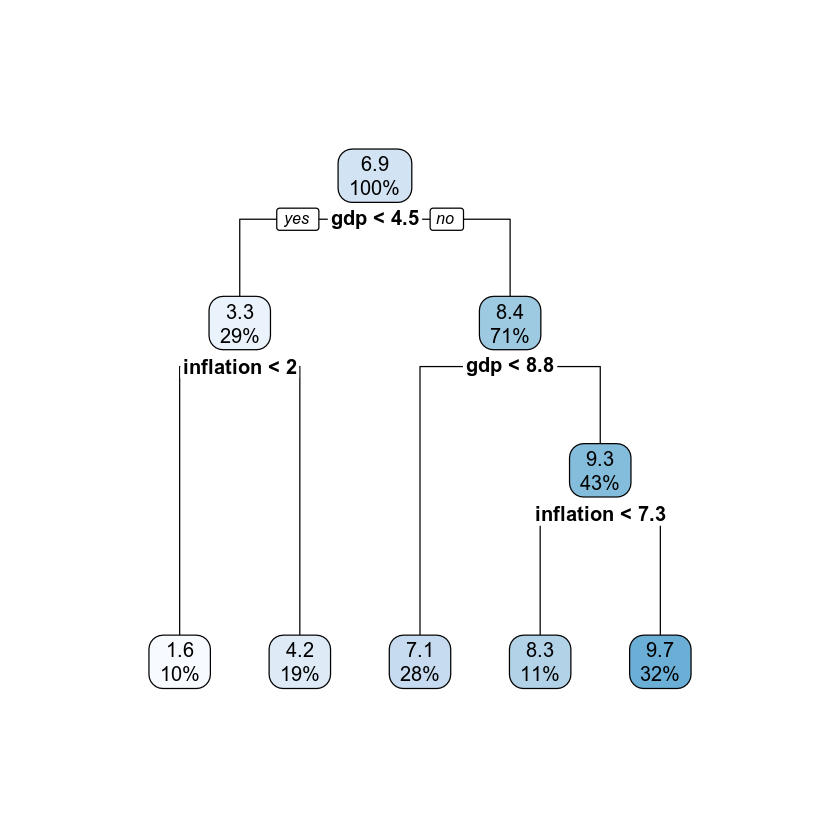

In [14]:
library(rpart.plot)
rpart.plot(pruned_model2)

## Step 14: Root Mean Squared Error (RMSE)
In this step, you will calculate the Root Mean Squared Error (RMSE). RMSE is the standard deviation of prediction errors. Recall that the prediction errors are called residuals. RMSE is the standard deviation of residuals. It can be expressed as follows:
<br><br>

\begin{equation*}
RMSE = \sqrt{ \frac{\sum_{i=1}^{n} \ (\ predicted_i\ -\ observed_i\ )^2} { n }  } 
\end{equation*}
<br><br>

The code below implements a user-defined function called RMSE. 


Click the code section below and hit the **Run** button above.

In [15]:
# Here is a custom R function to calculate Root Mean Squared Error or RMSE for any regression model. The following function (called RMSE) will calculate the Root Mean Squared Error
# based on the formula shown above.
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

# Calculate RMSE 
pred <- predict(pruned_model2, newdata=test.data2, type='vector')
print("Root Mean Squared Error")
rmse <- RMSE(pred, test.data2$wage_growth)
round(rmse, 4)

[1] "Root Mean Squared Error"


[1] 1.0558

## Step 15: Prediction
The regression decision tree model can now be used to make predictions.   

Click the block of code below and hit the **Run** button above.  

In [16]:
print("Predicted wage growth: economy='no_recession', inflation=2.10, gdp=2.5")
newdata3 <- data.frame(economy='no_recession', inflation=2.10, gdp=2.5)
predicted_wage_growth = predict(pruned_model2, newdata3, type='vector')
round(predicted_wage_growth,4)

print("Predicted wage growth: economy='no_recession', inflation=3.50, gdp=6.8")
newdata4 <- data.frame(economy='no_recession', inflation=3.50, gdp=6.8)
predicted_wage_growth = predict(pruned_model2, newdata4, type='vector')
round(predicted_wage_growth,4)

[1] "Predicted wage growth: economy='no_recession', inflation=2.10, gdp=2.5"


1 
4.2027

[1] "Predicted wage growth: economy='no_recession', inflation=3.50, gdp=6.8"


1 
7.0595

## Your Code

You have been asked to create decision tree models in the Module Six Problem Set. Review the Problem Set Report template to see the questions you will be answering about your models.

Use the empty blocks below to write the R code for your models and get outputs. Then use the outputs to answer the questions in your problem set report.

**Note: Use the + (plus) button to add new code blocks or the scissor icon to remove empty code blocks, if needed.**

In [17]:
print(credit_default)

    age    sex    education  marriage    assets missed_payment credit_utilize
1    28   male      college   married     house             no          0.191
2    31 female postgraduate   married car_house             no          0.196
3    48 female      college   married     house            yes          1.000
4    35   male  high_school   married       car            yes          1.000
5    30 female  high_school unmarried       car             no          0.374
6    23 female  high_school unmarried     house            yes          0.970
7    21   male postgraduate   married       car             no          0.153
8    30   male  high_school unmarried      none            yes          0.472
9    30   male  high_school unmarried car_house             no          0.260
10   34 female      college   married      none            yes          0.337
11   30 female      college unmarried       car            yes          0.339
12   50   male postgraduate   married car_house            yes  

In [13]:
set.seed(6751342)

# Partition the data set into training and testing data
samp.size = floor(0.70*nrow(credit_default))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(credit_default)), size = samp.size)
train.data3 = credit_default[train_ind,]
nrow(train.data3)

# Testing set 
print("Number of rows for the validation set")
test.data3 = credit_default[-train_ind,]
nrow(test.data3)

[1] "Number of rows for the training set"


[1] 420

[1] "Number of rows for the validation set"


[1] 180

In [14]:
set.seed(6751342)

library(rpart)
model3 <- rpart(default ~ missed_payment + credit_utilize + assets, method="class", data=train.data3, control = rpart.control(minsplit=10))
printcp(model3)


Classification tree:
rpart(formula = default ~ missed_payment + credit_utilize + assets, 
    data = train.data3, method = "class", control = rpart.control(minsplit = 10))

Variables actually used in tree construction:
[1] assets         credit_utilize missed_payment

Root node error: 198/420 = 0.47143

n= 420 

        CP nsplit rel error  xerror     xstd
1 0.792929      0   1.00000 1.00000 0.051668
2 0.045455      1   0.20707 0.20707 0.030720
3 0.010101      3   0.11616 0.12121 0.024025
4 0.010000      5   0.09596 0.13131 0.024943


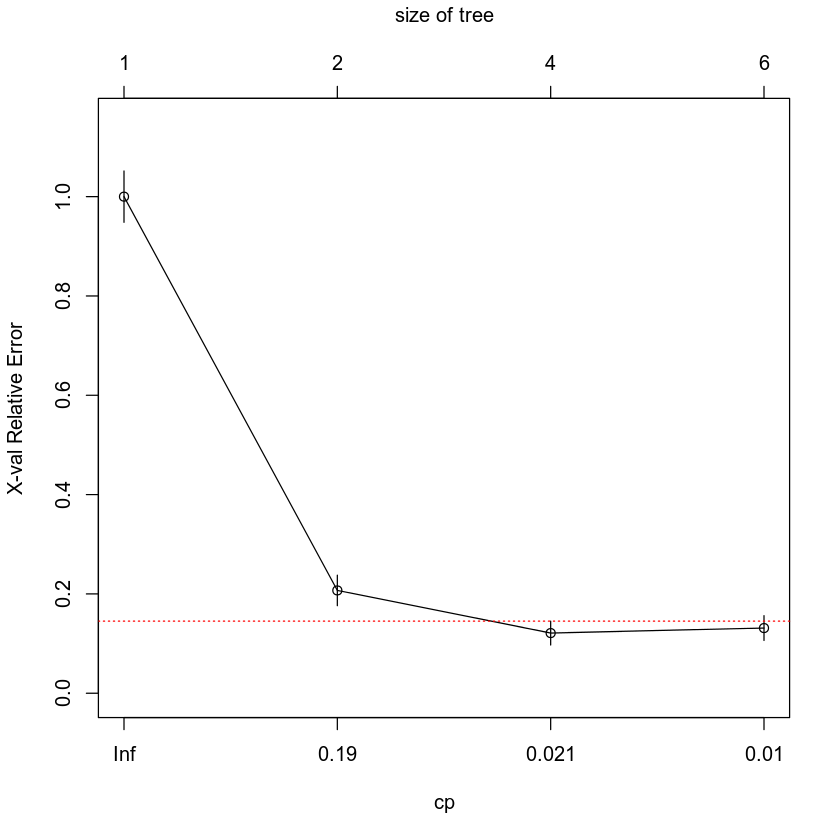

In [15]:
#plotcp(model) # Visualize cross validation results
plotcp(model3, minline = TRUE, lty = 3, col = 2, upper = c("size", "splits", "none"))

In [27]:
set.seed(6751342)
pruned_model3 <- rpart(default ~ missed_payment + credit_utilize + assets, method="class", data=train.data3, control = rpart.control(cp=0.021))
printcp(pruned_model3)


Classification tree:
rpart(formula = default ~ missed_payment + credit_utilize + assets, 
    data = train.data3, method = "class", control = rpart.control(cp = 0.021))

Variables actually used in tree construction:
[1] assets         credit_utilize

Root node error: 198/420 = 0.47143

n= 420 

        CP nsplit rel error  xerror     xstd
1 0.792929      0   1.00000 1.00000 0.051668
2 0.045455      1   0.20707 0.20707 0.030720
3 0.021000      3   0.11616 0.12121 0.024025


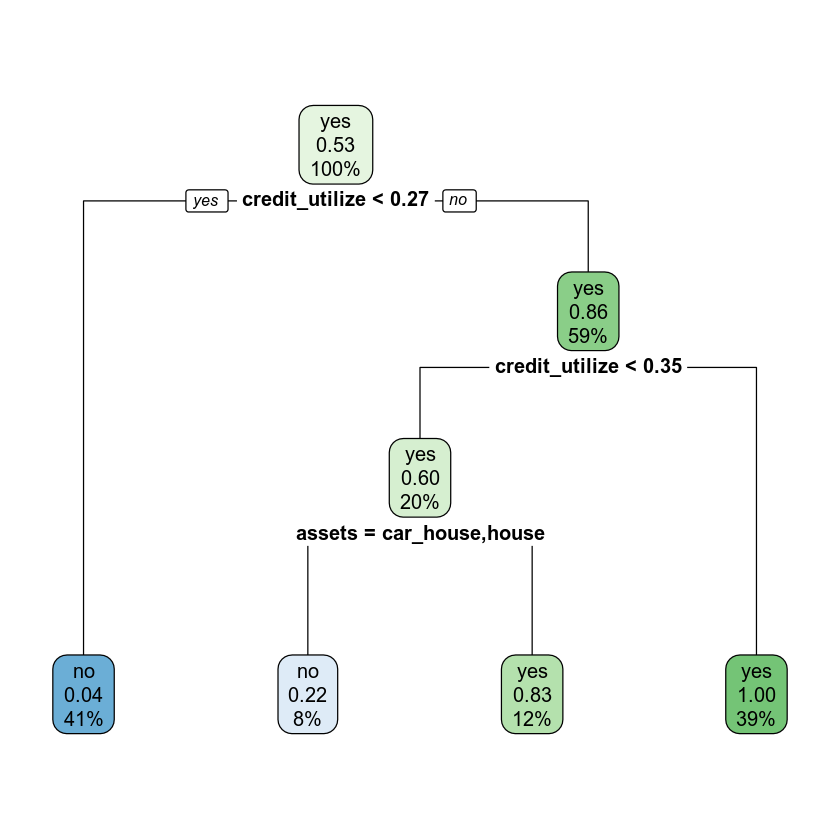

In [29]:
library(rpart.plot)
rpart.plot(pruned_model3)

In [30]:
# Make predictions on the test data
pred <- predict(pruned_model3, newdata=test.data3, type='class')

# Construct the confusion matrix
conf.matrix <- table(test.data3$default, pred)[,c('no','yes')]
rownames(conf.matrix) <- paste("Actual default ", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction default ", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction default : no,Prediction default : yes
Actual default : no,74,4
Actual default : yes,2,100


In [33]:
print("Prediction for defaulting (yes or no): missed_payment='none', assets='car_house', credit_utilize=0.3")
newdata3 <- data.frame(missed_payment='no', assets='car_house', credit_utilize=0.3)
predict(pruned_model3, newdata3, type='class')

print("Prediction for defaulting (yes or no): missed_payment='yes', assets='none', credit_utilize=0.3")
newdata3 <- data.frame(missed_payment='yes', assets='none', credit_utilize=0.3)
predict(pruned_model3, newdata3, type='class')

[1] "Prediction for defaulting (yes or no): missed_payment='none', assets='car_house', credit_utilize=0.3"


1 
no 
Levels: no yes

[1] "Prediction for defaulting (yes or no): missed_payment='yes', assets='none', credit_utilize=0.3"


1 
yes 
Levels: no yes

In [20]:
#Wage Earnings Tree Section Below

In [21]:
print(economic)

   wage_growth inflation unemployment      economy     education   gdp
1         7.30      4.49         3.56 no_recession       college  6.27
2         9.05      9.59         2.42 no_recession       college  9.44
3        10.08     11.36         1.23 no_recession post_graduate 18.29
4        10.98      9.55         1.18 no_recession post_graduate 19.96
5         8.54      8.63         2.54 no_recession   high_school  8.43
6         9.75      8.26         2.22 no_recession       college 17.85
7         2.28      1.71         9.33    recession   high_school  2.20
8         3.20      3.04         7.13    recession post_graduate  3.64
9         9.62      6.60         1.91 no_recession   high_school 13.93
10        5.20      3.62         4.66    recession post_graduate  4.78
11        7.34      5.91         2.95 no_recession   high_school  7.62
12        5.76      3.00         4.12    recession post_graduate  5.80
13        3.59      3.17         6.51    recession   high_school  4.03
14    

In [22]:
set.seed(6751342)

# Partition the data set into training and testing data
samp.size = floor(0.80*nrow(economic))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(economic)), size = samp.size)
train.data4 = economic[train_ind,]
nrow(train.data4)

# Testing set 
print("Number of rows for the testing set")
test.data4 = economic[-train_ind,]
nrow(test.data4)

[1] "Number of rows for the training set"


[1] 79

[1] "Number of rows for the testing set"


[1] 20

In [23]:
set.seed(6751342)

library(rpart)
model4 <- rpart(wage_growth ~ economy + unemployment + gdp, method="anova", data=train.data4, control = rpart.control(minsplit=10))
printcp(model4)


Regression tree:
rpart(formula = wage_growth ~ economy + unemployment + gdp, data = train.data4, 
    method = "anova", control = rpart.control(minsplit = 10))

Variables actually used in tree construction:
[1] gdp          unemployment

Root node error: 587.64/79 = 7.4385

n= 79 

        CP nsplit rel error  xerror     xstd
1 0.708690      0  1.000000 1.02234 0.148393
2 0.129011      1  0.291310 0.35817 0.048483
3 0.059161      2  0.162299 0.23645 0.032876
4 0.023760      3  0.103138 0.17992 0.027038
5 0.015015      4  0.079378 0.17113 0.024920
6 0.012324      5  0.064363 0.13864 0.020731
7 0.010000      6  0.052039 0.13256 0.019947


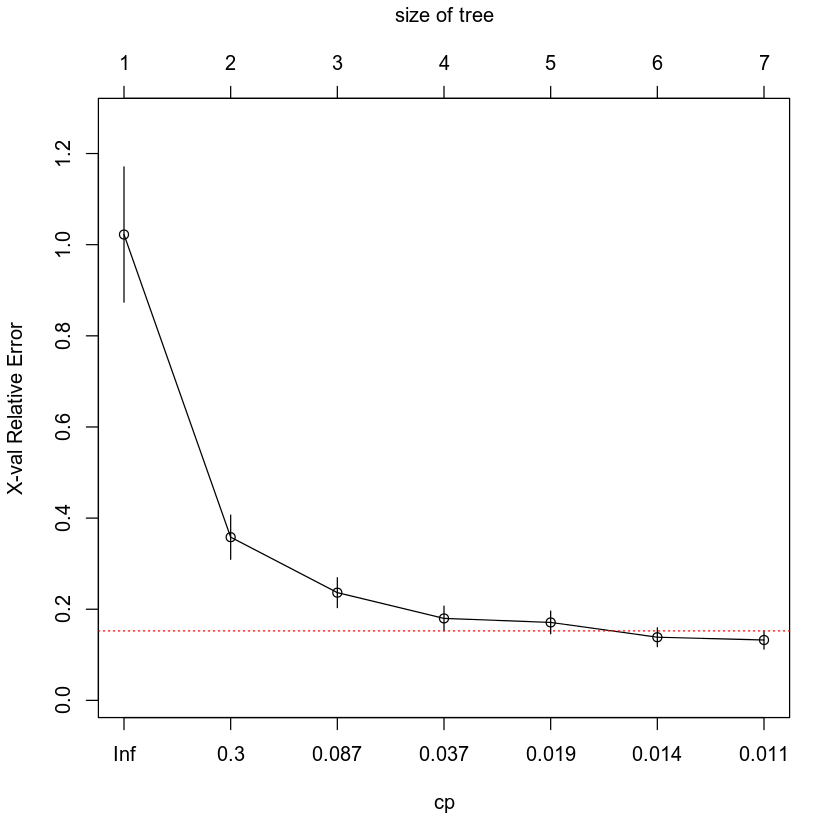

In [6]:
# Visualize cross validation results
plotcp(model4, minline = TRUE, lty = 3, col = 2, upper = c("size", "splits", "none"))

In [31]:
set.seed(6751342)

library(rpart)
pruned_model4 <- rpart(wage_growth ~ economy + unemployment + gdp, method="anova", data=train.data4, control = rpart.control(cp=0.014))
printcp(pruned_model4)


Regression tree:
rpart(formula = wage_growth ~ economy + unemployment + gdp, data = train.data4, 
    method = "anova", control = rpart.control(cp = 0.014))

Variables actually used in tree construction:
[1] gdp          unemployment

Root node error: 587.64/79 = 7.4385

n= 79 

        CP nsplit rel error  xerror     xstd
1 0.708690      0  1.000000 1.02234 0.148393
2 0.129011      1  0.291310 0.35817 0.048483
3 0.059161      2  0.162299 0.23645 0.032876
4 0.023760      3  0.103138 0.23034 0.032585
5 0.014000      4  0.079378 0.20281 0.029362


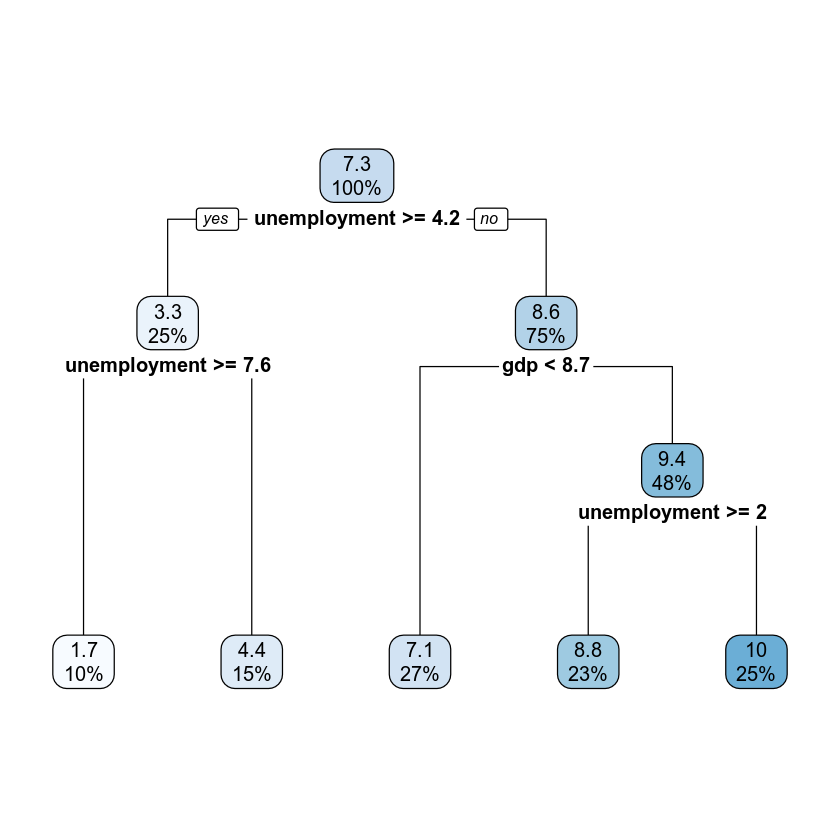

In [32]:
library(rpart.plot)
rpart.plot(pruned_model4)

In [34]:
# Here is a custom R function to calculate Root Mean Squared Error or RMSE for any regression model. The following function (called RMSE) will calculate the Root Mean Squared Error
# based on the formula shown above.
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

# Calculate RMSE 
pred <- predict(pruned_model4, newdata=test.data4, type='vector')
print("Root Mean Squared Error")
rmse <- RMSE(pred, test.data4$wage_growth)
round(rmse, 4)

[1] "Root Mean Squared Error"


[1] 1.0268

In [38]:
print("Prediction for wage growth: economy='no_recession', unemployment='car_house', gdp=0.3")
newdata4 <- data.frame(economy='no_recession', unemployment=3.4, gdp=3.5)
predict(pruned_model4, newdata4, type='vector')

print("Prediction for wage growth: economy='recession', unemployment='car_house', gdp=0.3")
newdata5 <- data.frame(economy='recession', unemployment=7.4, gdp=1.4)
predict(pruned_model4, newdata5, type='vector')

[1] "Prediction for wage growth: economy='no_recession', unemployment='car_house', gdp=0.3"


1 
7.081429

[1] "Prediction for wage growth: economy='recession', unemployment='car_house', gdp=0.3"


1 
4.4025

## End of Module Six Jupyter Notebook
Attach the HTML output along with your problem set report for the Module Six Problem Set. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in your problem set report. 